# DS 3000 - Assignment [4]

**Student Name**: [Yanzhen Chen]

**Date**: [9/24]


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1: Office of Addiction Services and Support chemical dependence treatment programs (50 pts)

The Office of Addiction Services and Support publishes a dataset on reported admissions of people in certified chemical dependence treatment programs throughout New York State (NYS). This dataset includes the number of admissions to certified treatment programs aggregated by the program category, county of the program location, age group of client at admission, and the primary substance of abuse group. For more information about this program, visit the following websiteLinks to an external site.

You are given the task of performing a comprehensive analysis of the admission statistics from 2007 to 2021 and summarize your findings.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. (0 pts) Load the data directly from the url into a dataframe. Here is the link to the data: https://drive.google.com/uc?export=download&id=1aWQsq0fdL3SF-jyrVMpEAtHW9FFSF2xOLinks to an external site.

In [6]:
url = 'https://drive.google.com/uc?export=download&id=1aWQsq0fdL3SF-jyrVMpEAtHW9FFSF2xO'
ad_df = pd.read_csv(url)

2. (5 pts) Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types (if needed) and perform at least one additional data preparation step. 

In [8]:
print(ad_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99367 entries, 0 to 99366
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Year                        99367 non-null  int64 
 1   County of Program Location  99367 non-null  object
 2   Program Category            99367 non-null  object
 3   Service Type                99367 non-null  object
 4   Age Group                   99367 non-null  object
 5   Primary Substance Group     99366 non-null  object
 6   Admissions                  99367 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 5.3+ MB
None


I found that this dataset sets a lot of duplicate variables to objects, resulting in a large and inefficient running memory.

In [10]:
# For a large number of duplicate variables, convert the type to 'category'
ad_df['County of Program Location'] = ad_df['County of Program Location'].astype('category')
ad_df['Program Category'] = ad_df['Program Category'].astype('category')
ad_df['Service Type'] = ad_df['Service Type'].astype('category')
ad_df['Age Group'] = ad_df['Age Group'].astype('category')
ad_df['Primary Substance Group'] = ad_df['Primary Substance Group'].astype('category')

print(ad_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99367 entries, 0 to 99366
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Year                        99367 non-null  int64   
 1   County of Program Location  99367 non-null  category
 2   Program Category            99367 non-null  category
 3   Service Type                99367 non-null  category
 4   Age Group                   99367 non-null  category
 5   Primary Substance Group     99366 non-null  category
 6   Admissions                  99367 non-null  int64   
dtypes: category(5), int64(2)
memory usage: 2.0 MB
None


In [11]:
# One additional data preparation step.
# The missing row of data needs to be deleted to ensure the consistency of data quantity
ad_df_cleaned = ad_df.dropna(subset=['Primary Substance Group'])

print(ad_df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 99366 entries, 0 to 99366
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Year                        99366 non-null  int64   
 1   County of Program Location  99366 non-null  category
 2   Program Category            99366 non-null  category
 3   Service Type                99366 non-null  category
 4   Age Group                   99366 non-null  category
 5   Primary Substance Group     99366 non-null  category
 6   Admissions                  99366 non-null  int64   
dtypes: category(5), int64(2)
memory usage: 2.8 MB
None


3. (10 pts) Visualize the distribution of Age Groups, Program Category, Primary Substance Group, and Admissions. Ensure that you choose an appropriate graph based on the type of data. Explain each chart.

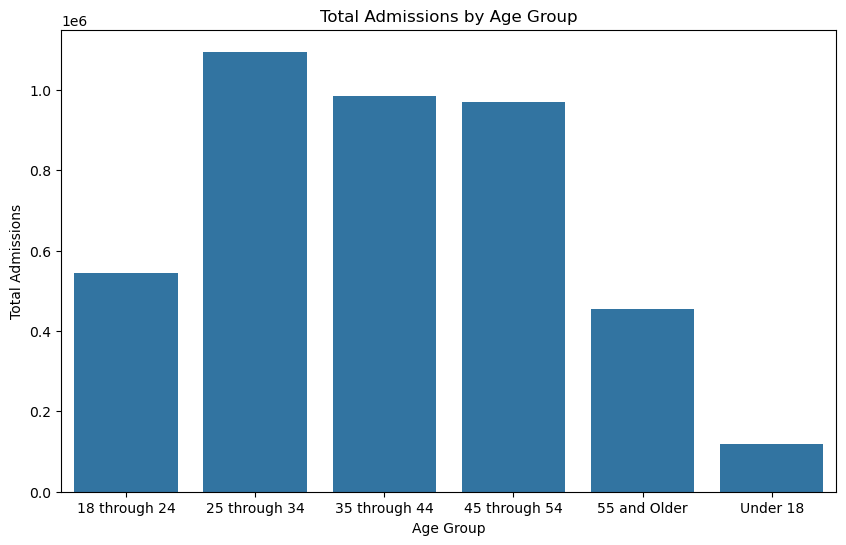

In [13]:
# 1. Age Groups
age_group_admissions = ad_df_cleaned.groupby('Age Group', observed=True)['Admissions'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Admissions', data=age_group_admissions)
plt.title('Total Admissions by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Admissions')
plt.show()

# The bar graph shows the distribution of enrollment by age group. 
# The x-axis shows the different age groups and the y-axis shows the number of admissions in each age group. 
# By using this graph, I can see which age groups most often enter chemical dependency treatment programs.

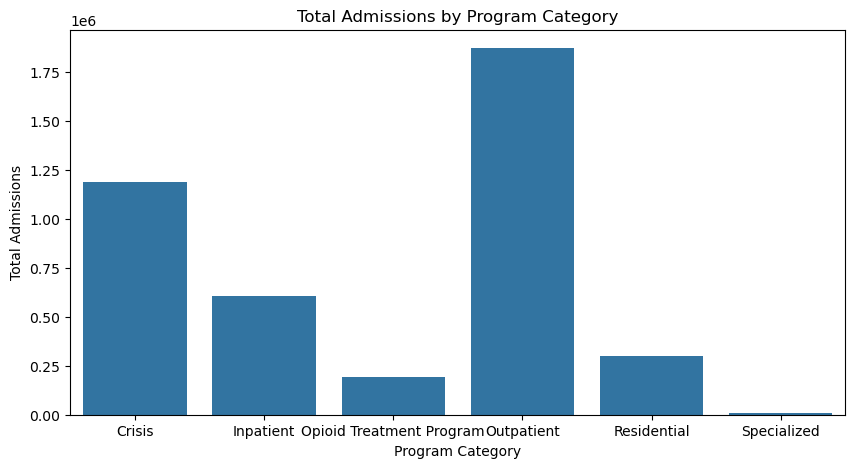

In [14]:
# 2. Program Category
age_group_admissions = ad_df_cleaned.groupby('Program Category', observed=True)['Admissions'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='Program Category', y='Admissions', data=age_group_admissions)
plt.title('Total Admissions by Program Category')
plt.xlabel('Program Category')
plt.ylabel('Total Admissions')
plt.show()

# The bar chart shows the distribution of enrollment in different Program Category. 
# The x-axis shows different program categories and y-axis shows the number of admissions in each program category.
# The height of the columns for the different categories shows how often different programs were used in the dataset.

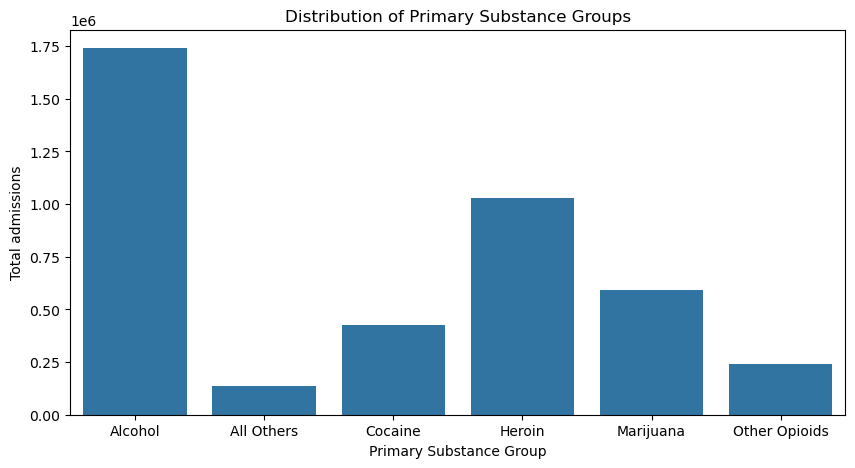

In [15]:
# 3. Primary Substance Group 
age_group_admissions = ad_df_cleaned.groupby('Primary Substance Group', observed=True)['Admissions'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='Primary Substance Group', y='Admissions',data=age_group_admissions)
plt.title('Distribution of Primary Substance Groups')
plt.xlabel('Primary Substance Group')
plt.ylabel('Total admissions')
plt.show()

# This graph shows the distribution of admissions for different primary substances of abuse.
# The x-axis shows the different substance groups and the y-axis shows the number of admissions for each substance group.
# The height of the bars for the different substance groups shows which substance abuse people enter treatment programs for most frequently.

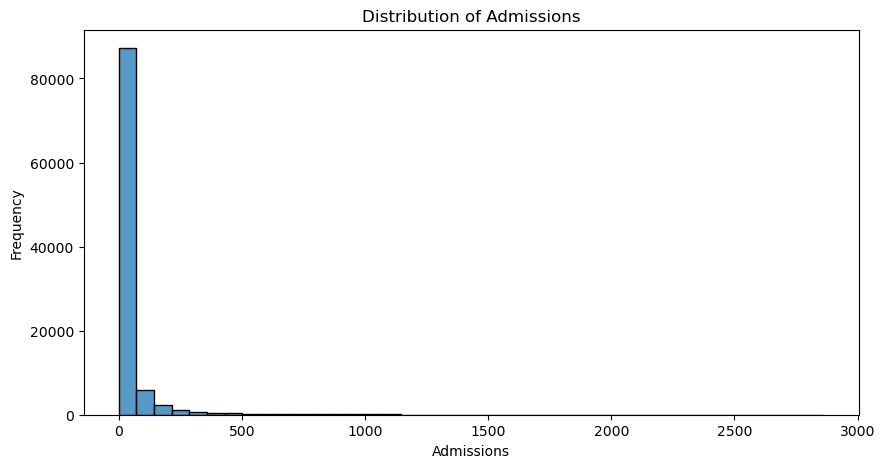

In [16]:
# 4. Admissions
plt.figure(figsize=(10, 5))
sns.histplot(ad_df_cleaned['Admissions'], bins=40)
plt.title('Distribution of Admissions')
plt.xlabel('Admissions')
plt.ylabel('Frequency')
plt.show()

# The histogram shows the distribution of enrollment. 
# The x-axis shows the number of admissions and y-axis shows the frequency of each interval.
# It helps us to understand the pattern of distribution of admissions.

4. (5 pts) Create a function called annualAdmissions() that calculates the total number of reported admissions that transpired each year, for the entire state of NY and display the results using a line chart. Annotate the chart to show the year with the highest number of admissions.
5 Execute the function in a new cell. Explain the chart and discuss any patterns or trends that you have observed over time.

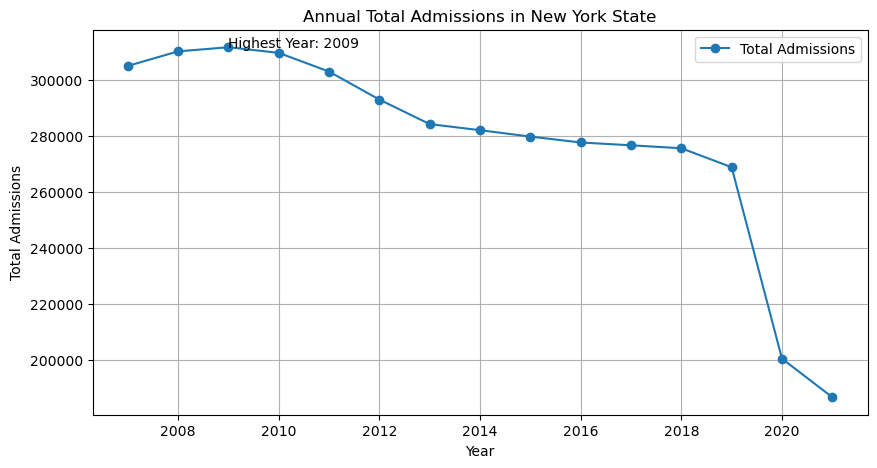

In [18]:
def annualAdmissions(ad_df):
    annual_admissions = ad_df.groupby('Year')['Admissions'].sum()

    plt.figure(figsize=(10, 5))
    plt.plot(annual_admissions.index, annual_admissions.values, marker='o', label='Total Admissions')

    # Annotate the max year
    max_year = annual_admissions.idxmax()
    max_admissions = annual_admissions.max()
    plt.annotate(f'Highest Year: {max_year}', xy=(max_year, max_admissions))

    plt.title('Annual Total Admissions in New York State')
    plt.xlabel('Year')
    plt.ylabel('Total Admissions')
    plt.grid(True)
    plt.legend()
    plt.show()

annualAdmissions(ad_df)

Explain：From the line graph, I can see that the overall trend is down. From 2007 to 2019 there is a steady decline, but from 2019 to 2021 there is a sharp decline in numbers.

5. (10 pts) Create a function called annualAdmissionsByCounty(year). The function should take the year as input, filter the data to find all admissions for that year and calculate the proportion of admissions grouped by county. For example, if the year is 2007, the function should calculate the admissions as follows: county A 75%, county B 20% and county C 2.5%, etc. Display a bar chart with the top 10 counties. Using a new cell, visualize the annualAdmissionsByCounty() for the last 10 years. What are the patterns that you have observed?

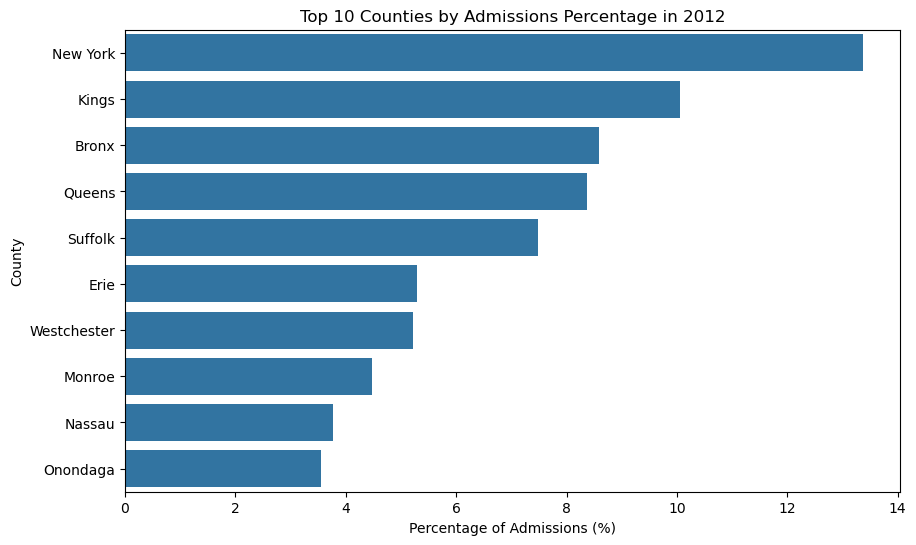

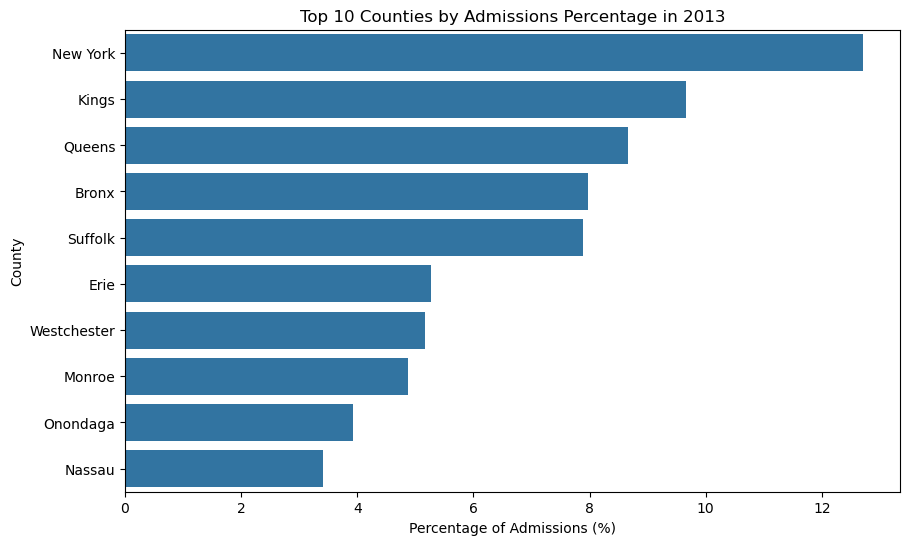

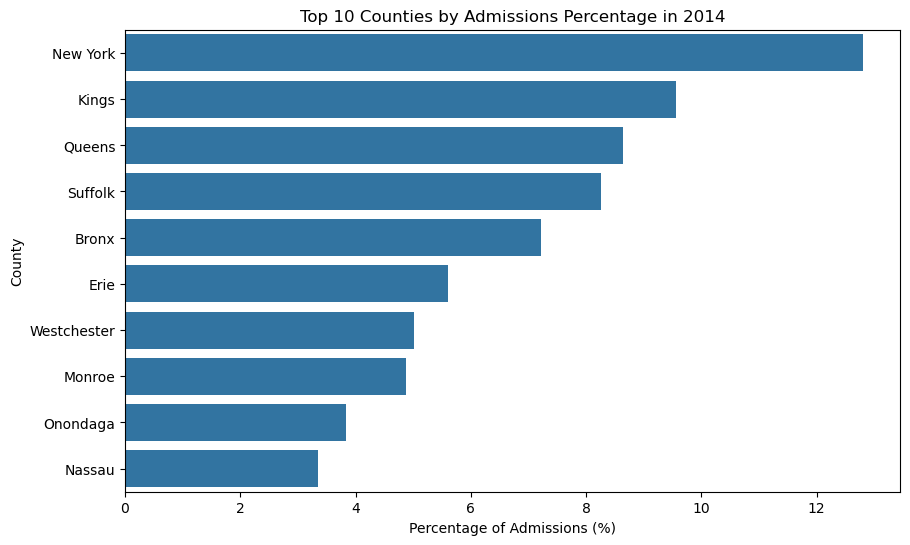

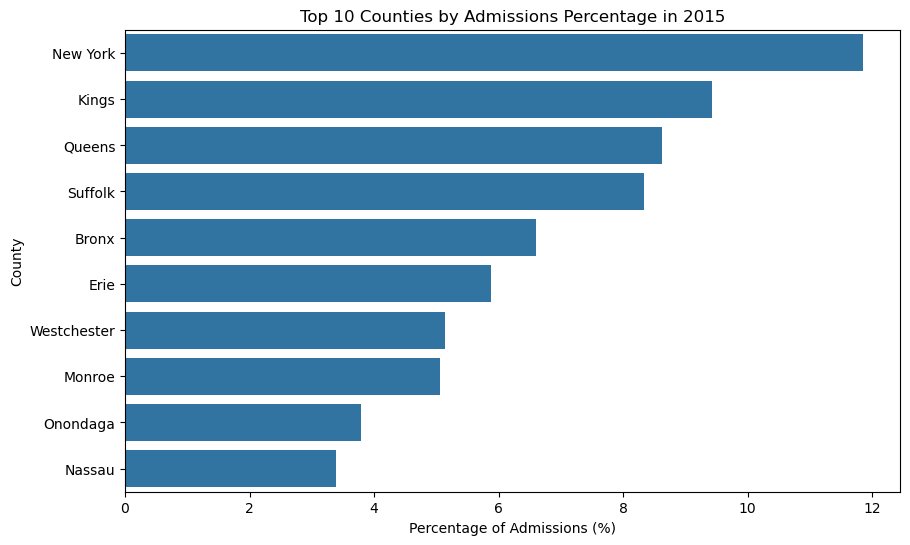

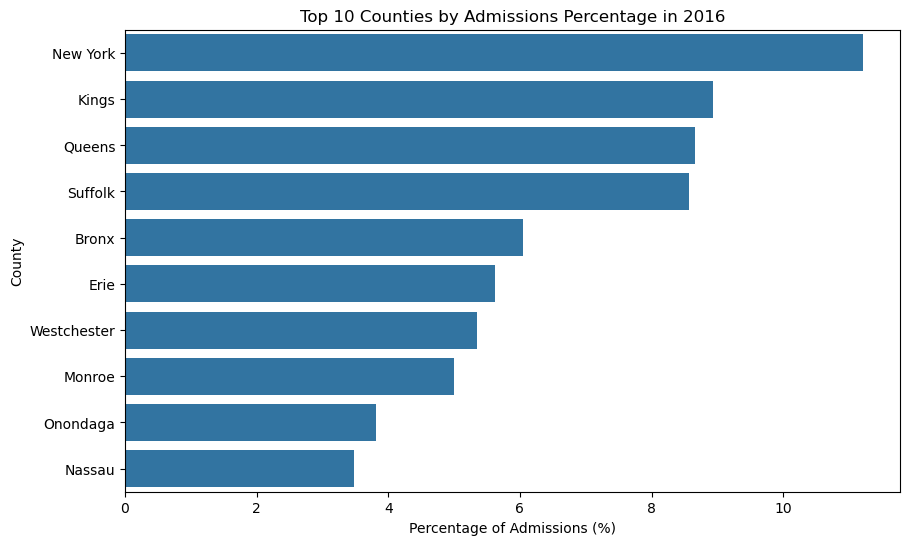

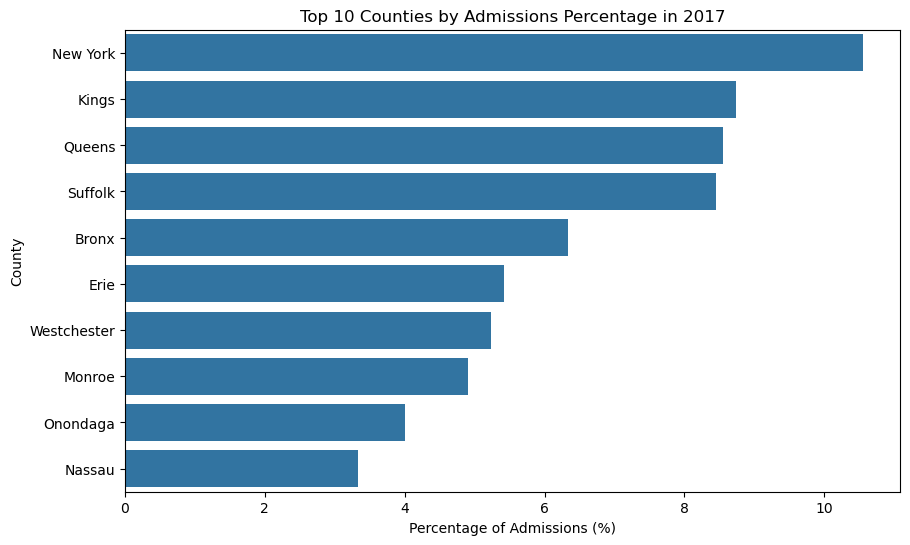

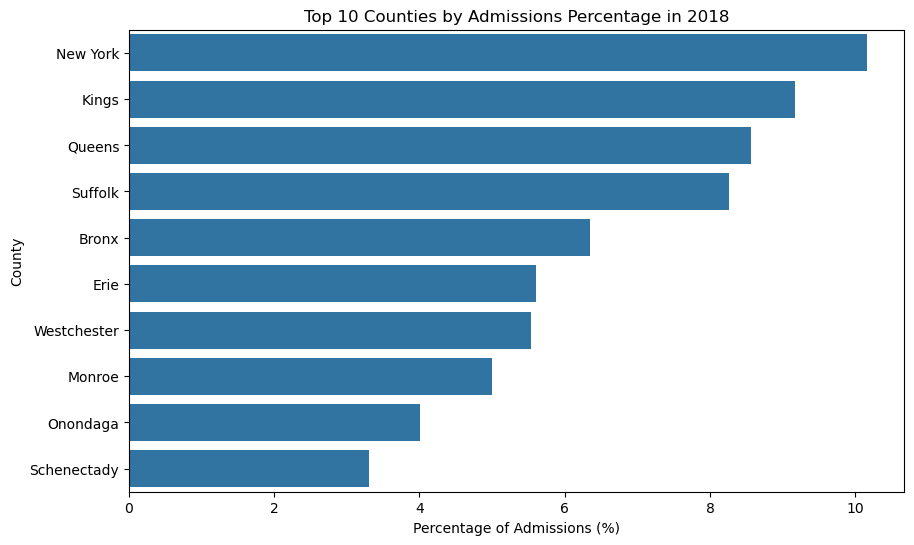

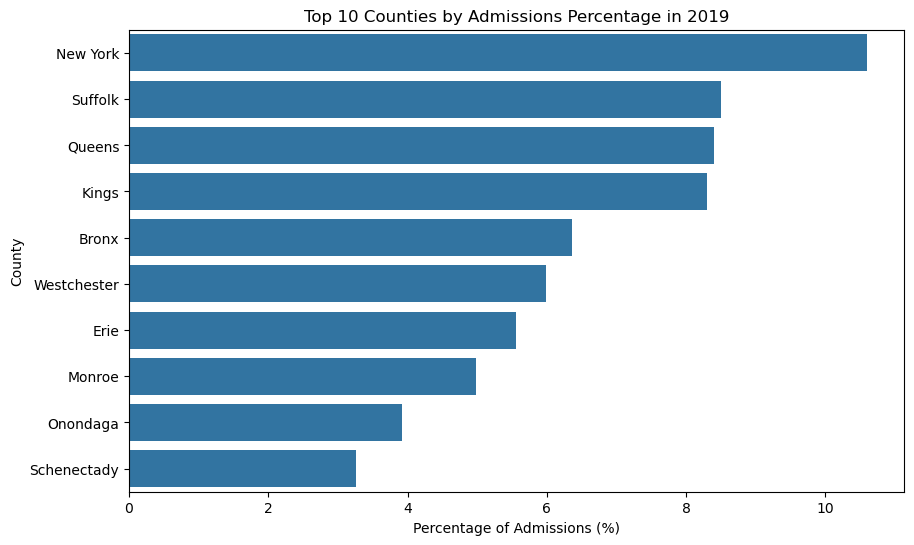

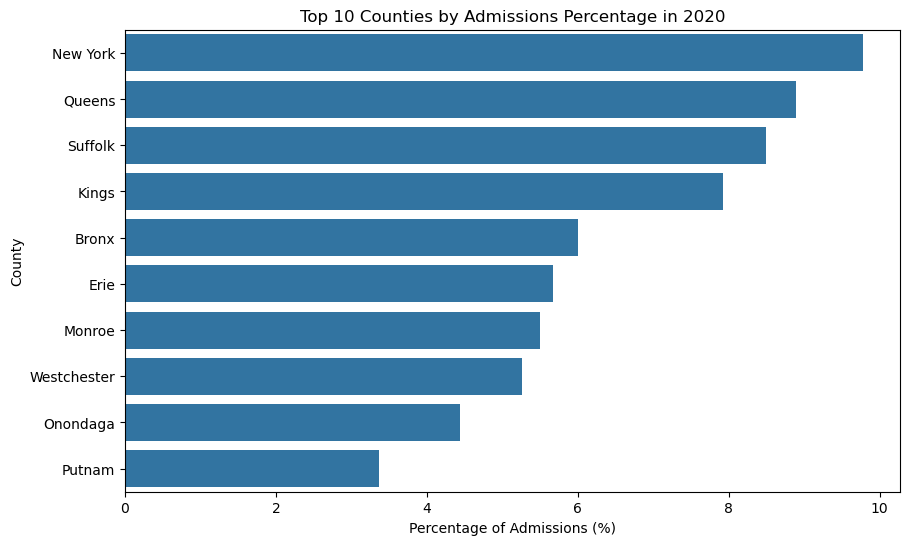

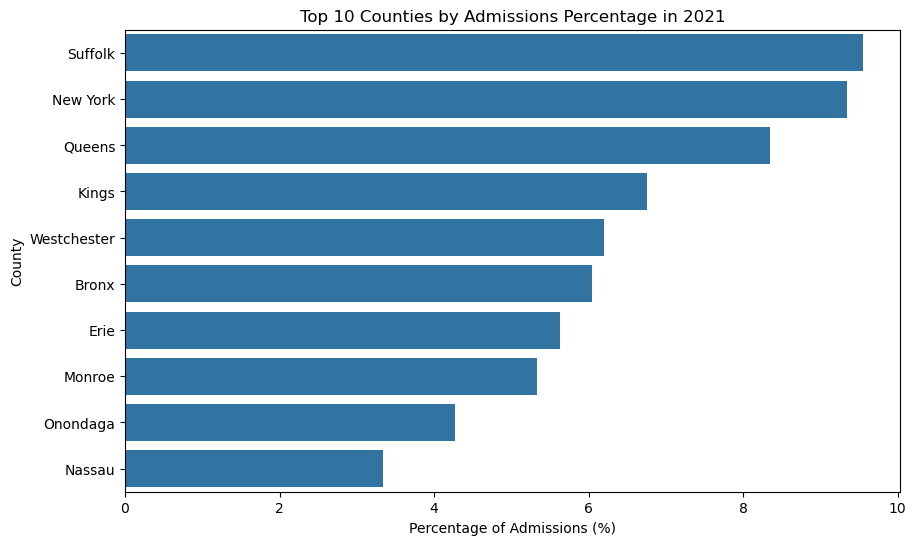

In [21]:
def annualAdmissionsByCounty(year):
    year_data = ad_df_cleaned[ad_df_cleaned['Year'] == year]
    county_admissions = year_data.groupby('County of Program Location', observed=True)['Admissions'].sum().reset_index()
    
    total_admissions = county_admissions['Admissions'].sum()
    county_admissions['Percentage'] = (county_admissions['Admissions'] / total_admissions) * 100
    
    # get top10
    top_10_counties = county_admissions.nlargest(10, 'Percentage')
    top_10_counties_sorted = top_10_counties.sort_values('Percentage', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Percentage', y='County of Program Location', data=top_10_counties_sorted,
                order=top_10_counties_sorted['County of Program Location']) 
    plt.title(f'Top 10 Counties by Admissions Percentage in {year}')
    plt.xlabel('Percentage of Admissions (%)')
    plt.ylabel('County')
    plt.show()
    
for year in range(2012, 2022): 
    annualAdmissionsByCounty(year)

I found that urban areas (e.g., New York County, Kings County, Bronx County) tended to dominate the top 10 enrollment ratios, reflecting the higher population density in urban areas as well as the higher concentration of treatment facilities. Counties in rural areas may appear less frequently, but when they do appear in the top 10, it may be due to a higher concentration of substance abuse problems in certain towns, which may also reflect a lack of treatment facilities elsewhere in the county.

6. (10 pts) Filter the data, and extract all admissions to the various “Rehab” facilities; i.e. you should perform a case-insensitive match for all facilities that include the word rehab, rehabilitation, etc. Using the filtered data, identify which substance is the most prominent among each age group. Visualize and explain the results.

        Age Group Primary Substance Group  Admissions
3   18 through 24                  Heroin       31583
9   25 through 34                  Heroin       67720
12  35 through 44                 Alcohol       78199
18  45 through 54                 Alcohol      104903
24   55 and Older                 Alcohol       56801
34       Under 18               Marijuana       14118


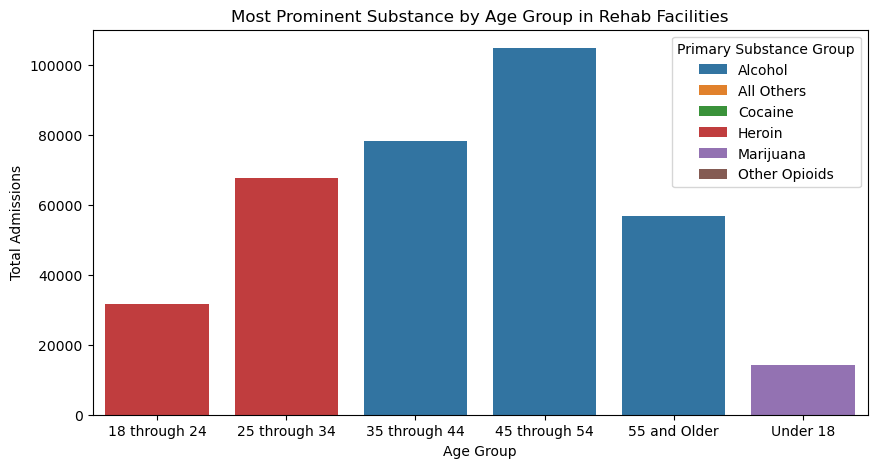

In [24]:
# Filter the data
rehab_data = ad_df_cleaned[ad_df_cleaned['Service Type'].str.contains('rehab|rehabilitation', case=False, na=False)]

# Calculate the total number of admissions for each substance
age_substance_group = rehab_data.groupby(['Age Group', 'Primary Substance Group'], observed=True)['Admissions'].sum().reset_index()

# Find the major substance with the largest number of admissions
most_prominent_substance = age_substance_group.loc[age_substance_group.groupby('Age Group', observed=True)['Admissions'].idxmax()]
print(most_prominent_substance)

plt.figure(figsize=(10, 5))
sns.barplot(x='Age Group', y='Admissions',  hue='Primary Substance Group', data=most_prominent_substance)
plt.title('Most Prominent Substance by Age Group in Rehab Facilities')
plt.xlabel('Age Group')
plt.ylabel('Total Admissions')
plt.legend(title='Primary Substance Group')
plt.show()


By analyzing data from rehabilitation facilities, it is possible to identify the most commonly abused substances in different age groups. For example, younger groups below the age of 35 may be more inclined to abuse psychotropic substances such as heroin or marijuana, while alcohol abuse is more common among those over 35. These findings help to develop more effective prevention and intervention measures for different age groups.

7. 10 pts) Using the filtered “rehab” data from question 6 above, identify any patterns in the admission to rehab facilities in any 5 counties and substance groups. Explain your observations.

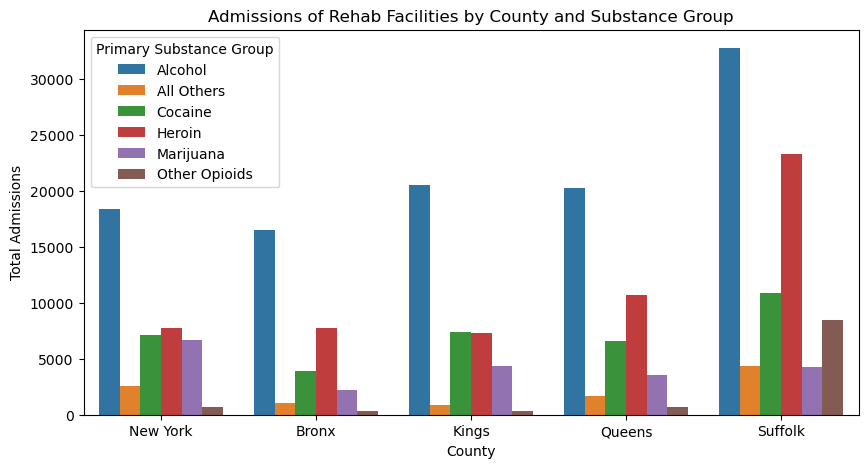

In [27]:
selected_counties = ['New York', 'Bronx', 'Kings', 'Queens', 'Suffolk']
county_data = rehab_data[rehab_data['County of Program Location'].isin(selected_counties)]
county_substance_group = county_data.groupby(['County of Program Location', 'Primary Substance Group'], observed=True)['Admissions'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='County of Program Location', y='Admissions', hue='Primary Substance Group', data=county_substance_group,
            order=selected_counties)
plt.title('Admissions of Rehab Facilities by County and Substance Group')
plt.xlabel('County')
plt.ylabel('Total Admissions')
plt.legend(title='Primary Substance Group')
plt.show()

Explain: Alcohol is the most common substance of abuse in all five counties. Alcohol abuse enrollment is significantly higher than other substances in every county, especially in Suffolk County. Heroin abuse had the second highest enrollment in most counties, after alcohol. From the charts I can see that there are differences in substance abuse patterns from county to county, and that public policies and interventions for this type of abuse should be customized to the specific county.

8. (5 pts)[optional/bonus] Create any (1) visualization of your choice to demonstrate something interesting about the data. Ensure that you explain what you will demonstrate and the results.

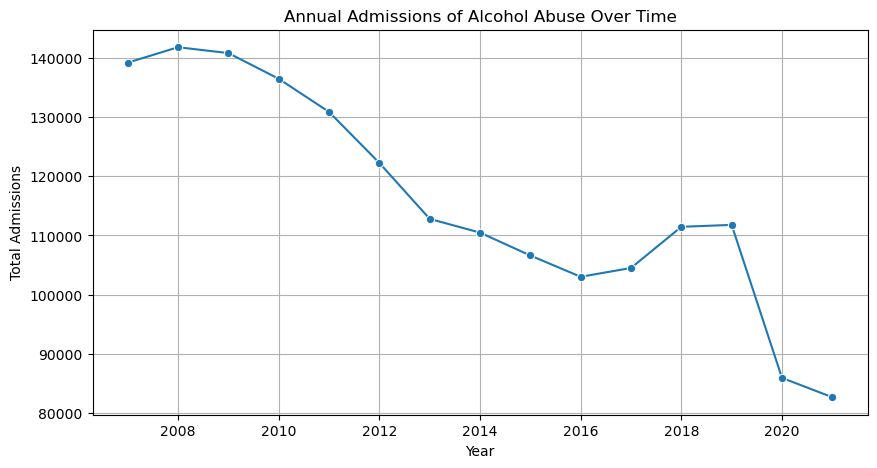

In [30]:
# From the above chart, I found that alcohol abuse is predominant, 
# so I would like to create a line graph to reflect the change in the number of alcohol abusers each year.
alcohol_data = ad_df_cleaned[ad_df_cleaned['Primary Substance Group'] == 'Alcohol']

annual_admissions_alcohol = alcohol_data.groupby('Year')['Admissions'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='Admissions', data=annual_admissions_alcohol, marker='o')
plt.title('Annual Admissions of Alcohol Abuse Over Time')
plt.xlabel('Year')
plt.ylabel('Total Admissions')
plt.grid(True)
plt.show()

Explain: From this line graph, it is found that admissions for alcohol abuse are decreasing year by year, with a particularly sharp decline from 2019 to 2020.